### Association Rule with Apriori

### Team 4

Yu-Chih (Wisdom) Chen

Jessy Hu

Boya Zeng

Yuqing Wu

#### Date: 02/29/2022

In [42]:
#!pip install mlxtend

In [3]:
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

df = pd.read_csv('/Users/zhaochangjin/Desktop/Data Mining/instacart.csv')
df.head(50)

order_id  product_id  add_to_cart_order  reordered  \
0          2       33120                  1          1   
1         26       33120                  5          0   
2        120       33120                 13          0   
3        327       33120                  5          1   
4        390       33120                 28          1   
5        537       33120                  2          1   
6        582       33120                  7          1   
7        608       33120                  5          1   
8        623       33120                  1          1   
9        689       33120                  4          1   
10       689       35921                  3          1   
11       726       33120                  3          1   
12       726       32655                  5          1   
13       771       33120                 29          1   
14       800       33120                  3          1   
15       901       33120                  3          1   
16      1005       33120                  5          1   
17      1097       33120                 14          1   
18      1193       33120                  5          1   
19      1300       33120                  1          1   
20      1887       33120                  6          1   
21      2082       33120                 20          0   
22      2082       11520                  3          0   
23      2357       33120                  6          1   
24      2551       33120                  6          1   
25      2652       33120                  1          1   
26      2846       33120                 10          1   
27      2846       30233                 11          1   
28      2929       33120                  1          0   
29      3031       33120                  2          1   
30      3302       33120                  3          0   
31      3304       33120                  4          1   
32      3351       33120                  3          1   
33      3365       33120                  2          1   
34      3426       33120                  3          1   
35      3488       33120                 21          1   
36      4075       33120                 12          1   
37      4105       33120                  5          1   
38      4254       33120                 10          1   
39      4254       30233                  3          1   
40      4560       33120                  2          0   
41      4731       33120                  4          0   
42      5256       33120                 10          1   
43      5256       32655                  9          0   
44      5640       33120                  9          1   
45      5733       33120                  8          0   
46      5812       33120                  4          0   
47      5864       33120                  2          0   
48      5864       36550                  1          0   
49      6173       33120                  1          1   

                                   product_name  aisle_id  department_id  \
0                            Organic Egg Whites        86             16   
1                            Organic Egg Whites        86             16   
2                            Organic Egg Whites        86             16   
3                            Organic Egg Whites        86             16   
4                            Organic Egg Whites        86             16   
5                            Organic Egg Whites        86             16   
6                            Organic Egg Whites        86             16   
7                            Organic Egg Whites        86             16   
8                            Organic Egg Whites        86             16   
9                            Organic Egg Whites        86             16   
10             Organic Large Grade A Brown Eggs        86             16   
11                           Organic Egg Whites        86             16   
12            Organic Large Grade AA Brown Eggs        86

In [4]:
df_baby=pd.read_csv('/Users/zhaochangjin/Desktop/Data Mining/baby_formula_df.csv')
df_baby.head(10)

order_id  product_id  add_to_cart_order  reordered  \
0      7518       33120                  6          1   
1      7518       32655                 13          1   
2     10977       33120                  6          1   
3     13215       33120                 13          1   
4     16825       33120                  1          0   
5     17731       33120                  1          1   
6     17731       14218                  4          1   
7     20556       33120                 20          0   
8     31365       33120                 14          1   
9     31365       23543                 15          1   

                           product_name  aisle_id  department_id  user_id  \
0                    Organic Egg Whites        86             16    74197   
1     Organic Large Grade AA Brown Eggs        86             16    74197   
2                    Organic Egg Whites        86             16    74197   
3                    Organic Egg Whites        86             16   107592   
4                    Organic Egg Whites        86             16    82364   
5                    Organic Egg Whites        86             16   140299   
6  Grade A Large Eggs Cage Free Omega 3        86             16   140299   
7                    Organic Egg Whites        86             16    13701   
8                    Organic Egg Whites        86             16   152544   
9        Organic Extra Large Brown Eggs        86             16   152544   

  eval_set  order_number  order_dow  order_hour_of_day  \
0    prior             9          3                 18   
1    prior             9          3                 18   
2    prior            38          6                 12   
3    prior            27          2                 14   
4    prior            13          6                  8   
5    prior             4          2                  8   
6    prior             4          2                  8   
7    prior            88          4                 12   
8    prior            31          4                 14   
9    prior            31          4                 14   

   days_since_prior_order aisle  department  
0                    10.0  eggs  dairy eggs  
1                    10.0  eggs  dairy eggs  
2                     6.0  eggs  dairy eggs  
3                     9.0  eggs  dairy eggs  
4                    15.0  eggs  dairy eggs  
5                     8.0  eggs  dairy eggs  
6                     8.0  eggs  dairy eggs  
7                     3.0  eggs  dairy eggs  
8                     7.0  eggs  dairy eggs  
9                     7.0  eggs  dairy eggs

In [5]:
unique_aisles = df_baby['aisle'].unique().tolist()
unique_aisles

['eggs',
 'soy lactosefree',
 'packaged cheese',
 'other creams cheeses',
 'yogurt',
 'milk',
 'cream',
 'butter',
 'refrigerated pudding desserts',
 'specialty cheeses',
 'fresh vegetables',
 'packaged vegetables fruits',
 'fresh fruits',
 'packaged produce',
 'fresh herbs',
 'spices seasonings',
 'oils vinegars',
 'baking ingredients',
 'doughs gelatins bake mixes',
 'spreads',
 'honeys syrups nectars',
 'pickled goods olives',
 'condiments',
 'marinades meat preparation',
 'preserved dips spreads',
 'salad dressing toppings',
 'baking supplies decor',
 'packaged poultry',
 'hot dogs bacon sausage',
 'poultry counter',
 'packaged meat',
 'meat counter',
 'seafood counter',
 'packaged seafood',
 'frozen produce',
 'frozen appetizers sides',
 'ice cream ice',
 'frozen pizza',
 'frozen breakfast',
 'frozen meals',
 'frozen vegan vegetarian',
 'frozen meat seafood',
 'frozen breads doughs',
 'frozen dessert',
 'frozen juice',
 'soft drinks',
 'water seltzer sparkling water',
 'tea',
 're

In [6]:
selected_aisles = ['baby food formula', 'baby bath body care', 'baby accessories', 'diapers wipes']
baby_orders = df_baby[df_baby['aisle'].isin(selected_aisles)]
baby_orders.head(100)

order_id  product_id  add_to_cart_order  reordered  \
1061994     13215       30529                  6          1   
1061995     13215        8912                  9          1   
1061996     13215       16466                 32          1   
1061997     13215       39468                  8          1   
1061998     13215       12492                 11          1   
...           ...         ...                ...        ...   
1062089    189117        1202                  1          0   
1062090    193745       44426                 25          0   
1062091    196045       21162                 39          0   
1062092    196045        2664                 34          1   
1062093    196045       47719                 33          1   

                                         product_name  aisle_id  \
1061994                Stage 2 Pear Pumpkin Baby Food        92   
1061995       Pears, Kale & Spinach Organic Baby Food        92   
1061996                  Organic Amaze Mint Baby Food        92   
1061997     Apples, Kale & Avocados Organic Baby Food        92   
1061998                        Baby Food Pears Squash        92   
...                                               ...       ...   
1062089  Organic Whole Grain Oatmeal Cereal Baby Food        92   
1062090     Happy Bellies Organic Oatmeal Baby Cereal        92   
1062091      Organic Mixed Berry Yogurt & Fruit Snack        92   
1062092                                  First Prunes        92   
1062093         Banana Raspberry & Brown Rice Stage 2        92   

         department_id  user_id eval_set  order_number  order_dow  \
1061994             18   107592    prior            27          2   
1061995             18   107592    prior            27          2   
1061996             18   107592    prior            27          2   
1061997             18   107592    prior            27          2   
1061998             18   107592    prior            27          2   
...                ...      ...      ...           ...        ...   
1062089             18   115185    prior             2          2   
1062090             18   108187    prior             2          4   
1062091             18   141804    prior            23          5   
1062092             18   141804    prior            23          5   
1062093             18   141804    prior            23          5   

         order_hour_of_day  days_since_prior_order              aisle  \
1061994                 14                     9.0  baby food formula   
1061995                 14                     9.0  baby food formula   
1061996                 14                     9.0  baby food formula   
1061997                 14                     9.0  baby food formula   
1061998                 14                     9.0  baby food formula   
...                    ...                     ...                ...   
1062089                 15                    19.0  baby food formula   
1062090                  9                    14.0  baby food formula   
1062091                 18                     5.0  baby food formula   
1062092                 18                     5.0  baby food formula   
1062093                 18                     5.0  baby food formula   

        department  
1061994     babies  
1061995     babies  
1061996     babies  
1061997     babies  
1061998     babies  
...            ...  
1062089     babies  
1062090     babies  
1062091     babies  
1062092     babies  
1062093     babies  

[100 rows x 15 columns]

In [7]:
baby_products = baby_orders['product_name'].unique().tolist()

In [8]:
len(baby_products)

956

In [9]:
order_id_baby_food=baby_orders['order_id'].unique().tolist()
order_id_baby_food

[13215,
 17731,
 31365,
 37142,
 48589,
 60794,
 79685,
 81679,
 97814,
 98504,
 101439,
 118242,
 135163,
 147534,
 151348,
 158691,
 165791,
 184122,
 185977,
 189117,
 193745,
 196045,
 206968,
 209201,
 237340,
 241368,
 249627,
 288987,
 305537,
 315459,
 319503,
 321504,
 321980,
 332266,
 352004,
 352284,
 376577,
 376657,
 377091,
 385177,
 391926,
 398827,
 399947,
 405305,
 411981,
 419790,
 443450,
 445549,
 456716,
 469284,
 485864,
 499213,
 505917,
 517439,
 528026,
 528732,
 533290,
 570359,
 594114,
 639029,
 639317,
 645052,
 670748,
 675332,
 687872,
 698469,
 700328,
 700630,
 708555,
 713291,
 715552,
 725565,
 740210,
 740821,
 759096,
 762988,
 765307,
 775314,
 779652,
 790443,
 791689,
 815322,
 833982,
 836809,
 861361,
 867320,
 886987,
 892321,
 900446,
 924325,
 929737,
 937821,
 946903,
 947631,
 947670,
 952823,
 961922,
 968384,
 982471,
 992811,
 1000529,
 1001753,
 1028324,
 1030939,
 1031496,
 1037694,
 1042544,
 1091584,
 1113589,
 1136685,
 1143383,


In [10]:
orders_with_baby_food = df_baby[df_baby['order_id'].isin(order_id_baby_food)]
orders_with_baby_food.head(20)

order_id  product_id  add_to_cart_order  reordered  \
3      13215       33120                 13          1   
5      17731       33120                  1          1   
6      17731       14218                  4          1   
8      31365       33120                 14          1   
9      31365       23543                 15          1   
16     37142       33120                  3          1   
18     48589       33120                 12          1   
19     48589       30233                  7          1   
20     60794       33120                 27          1   
21     60794       30385                 37          1   
23     79685       33120                  9          1   
24     81679       33120                  1          0   
31     97814       33120                  7          1   
32     98504       33120                  5          1   
33     98504       30385                  4          1   
35    101439       33120                 11          0   
36    118242       33120                 14          0   
37    135163       33120                 15          1   
38    147534       33120                 10          1   
39    151348       33120                 21          1   

                                   product_name  aisle_id  department_id  \
3                            Organic Egg Whites        86             16   
5                            Organic Egg Whites        86             16   
6          Grade A Large Eggs Cage Free Omega 3        86             16   
8                            Organic Egg Whites        86             16   
9                Organic Extra Large Brown Eggs        86             16   
16                           Organic Egg Whites        86             16   
18                           Organic Egg Whites        86             16   
19  Organic Large Brown Grade AA Cage Free Eggs        86             16   
20                           Organic Egg Whites        86             16   
21  Organic Free Range Grade A Large Brown Eggs        86             16   
23                           Organic Egg Whites        86             16   
24                           Organic Egg Whites        86             16   
31                           Organic Egg Whites        86             16   
32                           Organic Egg Whites        86             16   
33  Organic Free Range Grade A Large Brown Eggs        86             16   
35                           Organic Egg Whites        86             16   
36                           Organic Egg Whites        86             16   
37                           Organic Egg Whites        86             16   
38                           Organic Egg Whites        86             16   
39                           Organic Egg Whites        86             16   

    user_id eval_set  order_number  order_dow  order_hour_of_day  \
3    107592    prior            27          2                 14   
5    140299    prior             4          2                  8   
6    140299    prior             4          2                  8   
8    152544    prior            31          4                 14   
9    152544    prior            31          4                 14   
16    74197    prior            18          4                  8   
18   198261    prior            84          6                  9   
19   198261    prior            84          6                  9   
20   108187    prior            27          0                 21   
21   108187    prior            27          0                 21   
23    99495    prior            44          5                 20   
24    95741    prior             3          1                 12   
31   183459    prior            61          1                 11   
32   107024    prior            44          6                 10   
33   107024    prior            44          6                 10   
35   107592    prior            13          0                 13   
36    87535    prior            

In [11]:
orders_with_baby_food

order_id  product_id  add_to_cart_order  reordered  \
3           13215       33120                 13          1   
5           17731       33120                  1          1   
6           17731       14218                  4          1   
8           31365       33120                 14          1   
9           31365       23543                 15          1   
...           ...         ...                ...        ...   
1233630   1780189       32874                 27          0   
1233633   3154126       24362                 13          0   
1233636   2640202       10607                 14          1   
1233638    662033        2022                  3          0   
1233640   3038999       41420                  1          0   

                                 product_name  aisle_id  department_id  \
3                          Organic Egg Whites        86             16   
5                          Organic Egg Whites        86             16   
6        Grade A Large Eggs Cage Free Omega 3        86             16   
8                          Organic Egg Whites        86             16   
9              Organic Extra Large Brown Eggs        86             16   
...                                       ...       ...            ...   
1233630                        Brut Champagne       134              5   
1233633                   Brut Sparkling Wine       134              5   
1233636                              Prosecco       134              5   
1233638        Brut Cuvee Sparkling Champagne       134              5   
1233640                Valdobbiadene Prosecco       134              5   

         user_id eval_set  order_number  order_dow  order_hour_of_day  \
3         107592    prior            27          2                 14   
5         140299    prior             4          2                  8   
6         140299    prior             4          2                  8   
8         152544    prior            31          4                 14   
9         152544    prior            31          4                 14   
...          ...      ...           ...        ...                ...   
1233630   138674    prior             3          3                 14   
1233633   123098    prior            14          6                  8   
1233636   138674    prior             2          2                 11   
1233638   124418    prior             5          6                 17   
1233640   123098    prior            13          0                 11   

         days_since_prior_order                       aisle  department  
3                           9.0                        eggs  dairy eggs  
5                           8.0                        eggs  dairy eggs  
6                           8.0                        eggs  dairy eggs  
8                           7.0                        eggs  dairy eggs  
9                           7.0                        eggs  dairy eggs  
...                         ...                         ...         ...  
1233630                    22.0  specialty wines champagnes     alcohol  
1233633                     6.0  specialty wines champagnes     alcohol  
1233636                    20.0  specialty wines champagnes     alcohol  
1233638                     3.0  specialty wines champagnes     alcohol  
1233640                     2.0  specialty wines champagnes     alcohol  

[838346 rows x 15 columns]

In [12]:
from mlxtend.preprocessing import TransactionEncoder

In [13]:
df_baby_apri=df_baby[['order_id','product_name']]

In [14]:
df_baby_apri.head(20)

order_id                                 product_name
0       7518                           Organic Egg Whites
1       7518            Organic Large Grade AA Brown Eggs
2      10977                           Organic Egg Whites
3      13215                           Organic Egg Whites
4      16825                           Organic Egg Whites
5      17731                           Organic Egg Whites
6      17731         Grade A Large Eggs Cage Free Omega 3
7      20556                           Organic Egg Whites
8      31365                           Organic Egg Whites
9      31365               Organic Extra Large Brown Eggs
10     32442                           Organic Egg Whites
11     32442  Organic Free Range Grade A Large Brown Eggs
12     33153                           Organic Egg Whites
13     33153                          Large Alfresco Eggs
14     35164                           Organic Egg Whites
15     36023                           Organic Egg Whites
16     37142                           Organic Egg Whites
17     37983                           Organic Egg Whites
18     48589                           Organic Egg Whites
19     48589  Organic Large Brown Grade AA Cage Free Eggs

In [14]:
#df_baby_apri.head(10)

In [15]:
transactions = df_baby_apri.groupby('order_id')['product_name'].apply(list).tolist()
# Initialize the TransactionEncoder
encoder = TransactionEncoder()

# Fit and transform the data
onehot = encoder.fit_transform(transactions)

# Convert the one-hot encoded data to a DataFrame
onehot_df = pd.DataFrame(onehot, columns=encoder.columns_)
onehot_df.head(10)

#te = TransactionEncoder()
#te_ary = te.fit(dataset).transform(dataset)
#te_ary

#2 Coffee Filters  #4 Natural Brown Coffee Filters  \
0              False                            False   
1              False                            False   
2              False                            False   
3              False                            False   
4              False                            False   
5              False                            False   
6              False                            False   
7              False                            False   
8              False                            False   
9              False                            False   

   & Go! Hazelnut Spread + Pretzel Sticks  \
0                                   False   
1                                   False   
2                                   False   
3                                   False   
4                                   False   
5                                   False   
6                                   False   
7                                   False   
8                                   False   
9                                   False   

   0 Calorie Fuji Apple Pear Water Beverage  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   
5                                     False   
6                                     False   
7                                     False   
8                                     False   
9                                     False   

   0 Calorie Strawberry Dragonfruit Water Beverage  \
0                                            False   
1                                            False   
2                                            False   
3                                            False   
4                                            False   
5                                            False   
6                                            False   
7                                            False   
8                                            False   
9                                            False   

   0% Fat Black Cherry Greek Yogurt y  0% Fat Blueberry Greek Yogurt  \
0                               False                          False   
1                               False                          False   
2                               False                          False   
3                               False                          False   
4                               False                          False   
5                               False                          False   
6                               False                          False   
7                               False                          False   
8                               False                          False   
9                               False                          False   

   0% Fat Free Organic Milk  0% Fat Greek Yogurt Black Cherry on the Bottom  \
0                     False                                           False   
1                     False                                           False   
2                     False                                           False   
3                     False                                           False   
4                     False                                           False   
5                     False                                           False   
6                     False                                           False   
7                     False                                           False   
8                     False                                           False   
9                     False                                           False   

   0% Fat Organic Greek Vanilla Yogurt  ...  \
0                                False  ...   
1        

In [39]:
onehot_df

#2 Coffee Filters  #4 Natural Brown Coffee Filters  \
0                  False                            False   
1                  False                            False   
2                  False                            False   
3                  False                            False   
4                  False                            False   
...                  ...                              ...   
81998              False                            False   
81999              False                            False   
82000              False                            False   
82001              False                            False   
82002              False                            False   

       & Go! Hazelnut Spread + Pretzel Sticks  \
0                                       False   
1                                       False   
2                                       False   
3                                       False   
4                                       False   
...                                       ...   
81998                                   False   
81999                                   False   
82000                                   False   
82001                                   False   
82002                                   False   

       0 Calorie Fuji Apple Pear Water Beverage  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   
...                                         ...   
81998                                     False   
81999                                     False   
82000                                     False   
82001                                     False   
82002                                     False   

       0 Calorie Strawberry Dragonfruit Water Beverage  \
0                                                False   
1                                                False   
2                                                False   
3                                                False   
4                                                False   
...                                                ...   
81998                                            False   
81999                                            False   
82000                                            False   
82001                                            False   
82002                                            False   

       0% Fat Black Cherry Greek Yogurt y  0% Fat Blueberry Greek Yogurt  \
0                                   False                          False   
1                                   False                          False   
2                                   False                          False   
3                                   False                          False   
4                                   False                          False   
...                                   ...                            ...   
81998                               False                          False   
81999                               False                          False   
82000                               False                          False   
82001                               False                          False   
82002                               False                          False   

       0% Fat Free Organic Milk  \
0                         False   
1                         False   
2                         False   
3                         False   
4                         False   
...                         ...   
81998                     False   
81999                     False   
82000                     False   
82001                     False   
82002                     False   

       0% Fat Greek Yogurt Black Cherry o

In [16]:
frequent_itemsets = apriori(onehot_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

antecedents                 consequents  antecedent support  \
0    (100% Whole Wheat Bread)    (Bag of Organic Bananas)            0.038486   
1    (Bag of Organic Bananas)    (100% Whole Wheat Bread)            0.200322   
2    (Bag of Organic Bananas)  (Apple Honeycrisp Organic)            0.200322   
3  (Apple Honeycrisp Organic)    (Bag of Organic Bananas)            0.050437   
4  (Apple Honeycrisp Organic)                    (Banana)            0.050437   

   consequent support   support  confidence      lift  leverage  conviction  \
0            0.200322  0.011609    0.301648  1.505814  0.003900    1.145093   
1            0.038486  0.011609    0.057953  1.505814  0.003900    1.020665   
2            0.050437  0.016329    0.081512  1.616112  0.006225    1.033833   
3            0.200322  0.016329    0.323743  1.616112  0.006225    1.182506   
4            0.220004  0.011853    0.235010  1.068206  0.000757    1.019615   

   zhangs_metric  
0       0.349353  
1       0.420053  
2       0.476731  
3       0.401481  
4       0.067242

In [17]:
frequent_itemsets

support                                           itemsets
0    0.013999                           (100% Raw Coconut Water)
1    0.015548                       (100% Recycled Paper Towels)
2    0.038486                           (100% Whole Wheat Bread)
3    0.010902      (2% Reduced Fat DHA Omega-3 Reduced Fat Milk)
4    0.050437                         (Apple Honeycrisp Organic)
..        ...                                                ...
324  0.013634  (Organic Whole Milk, Organic Whole String Cheese)
325  0.010244  (Organic Hass Avocado, Bag of Organic Bananas,...
326  0.010853  (Organic Raspberries, Organic Hass Avocado, Ba...
327  0.014719  (Organic Hass Avocado, Bag of Organic Bananas,...
328  0.010768  (Organic Raspberries, Bag of Organic Bananas, ...

[329 rows x 2 columns]

In [18]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head(50)

antecedents  \
0                            (100% Whole Wheat Bread)   
1                            (Bag of Organic Bananas)   
2                            (Bag of Organic Bananas)   
3                          (Apple Honeycrisp Organic)   
4                          (Apple Honeycrisp Organic)   
5                                            (Banana)   
6                              (Organic Hass Avocado)   
7                          (Apple Honeycrisp Organic)   
8                          (Apple Honeycrisp Organic)   
9                              (Organic Strawberries)   
10  (Baby Food Stage 2 Blueberry Pear & Purple Car...   
11                 (Baby Food Stage 2 Pumpkin Banana)   
12                           (Bag of Organic Bananas)   
13  (Baby Food Stage 2 Blueberry Pear & Purple Car...   
14  (Baby Food Stage 2 Blueberry Pear & Purple Car...   
15                                           (Banana)   
16  (Baby Food Stage 2 Blueberry Pear & Purple Car...   
17               (Broccoli & Apple Stage 2 Baby Food)   
18            (Spinach Peas & Pear Stage 2 Baby Food)   
19  (Baby Food Stage 2 Blueberry Pear & Purple Car...   
20                           (Bag of Organic Bananas)   
21                             (Organic Baby Spinach)   
22                           (Bag of Organic Bananas)   
23                              (Organic Blueberries)   
24                           (Bag of Organic Bananas)   
25                                 (Organic Cucumber)   
26                           (Bag of Organic Bananas)   
27                            (Organic D'Anjou Pears)   
28                              (Organic Gala Apples)   
29                           (Bag of Organic Bananas)   
30                           (Bag of Organic Bananas)   
31                                   (Organic Garlic)   
32                           (Bag of Organic Bananas)   
33                              (Organic Half & Half)   
34                             (Organic Hass Avocado)   
35                           (Bag of Organic Bananas)   
36                           (Bag of Organic Bananas)   
37                                     (Organic Kiwi)   
38                           (Bag of Organic Bananas)   
39             (Organic Large Extra Fancy Fuji Apple)   
40                                    (Organic Lemon)   
41                           (Bag of Organic Bananas)   
42                           (Bag of Organic Bananas)   
43                                     (Organic Milk)   
44                              (Organic Raspberries)   
45                           (Bag of Organic Bananas)   
46  (Organic Sticks Low Moisture Part Skim Mozzare...   
47                           (Bag of Organic Bananas)   
48                           (Bag of Organic Bananas)   
49                             (Organic Strawberries)   

                                          consequents  antecedent support  \
0                            (Bag of Organic Bananas)            0.038486   
1                            (100% Whole Wheat Bread)            0.200322   
2                          (Apple Honeycrisp Organic)            0.200322   
3                            (Bag of Organic Bananas)            0.050437   
4                                            (Banana)            0.050437   
5                          (Apple Honeycrisp Organic)            0.220004   
6                          (Apple Honeycrisp Organic)            0.127239   
7                              (Organic Hass Avocado)            0.050437   
8                              (Organic Strawberries)            0.050437   
9                          (Apple Honeycrisp Organic)            0.161165   
10                 (Baby Food Stage 2 Pumpkin Banana)            0.049010   
11  (Baby Food Stage 2 Blueberry Pear & Purple Car...            0.027548   
12  (Baby Food Stage 2 Blueberry Pear & Purple Car...            0.200322   
13                           (Bag of Organic Bananas)   

In [40]:
rules

antecedents  \
0                          100% Whole Wheat Bread   
1                          Bag of Organic Bananas   
2                          Bag of Organic Bananas   
3                        Apple Honeycrisp Organic   
4                        Apple Honeycrisp Organic   
..                                            ...   
189     Organic Raspberries, Organic Strawberries   
190  Bag of Organic Bananas, Organic Strawberries   
191                           Organic Raspberries   
192                        Bag of Organic Bananas   
193                          Organic Strawberries   

                                      consequents  antecedent support  \
0                          Bag of Organic Bananas            0.038486   
1                          100% Whole Wheat Bread            0.200322   
2                        Apple Honeycrisp Organic            0.200322   
3                          Bag of Organic Bananas            0.050437   
4                                          Banana            0.050437   
..                                            ...                 ...   
189                        Bag of Organic Bananas            0.026523   
190                           Organic Raspberries            0.046852   
191  Bag of Organic Bananas, Organic Strawberries            0.091143   
192     Organic Raspberries, Organic Strawberries            0.200322   
193   Organic Raspberries, Bag of Organic Bananas            0.161165   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.200322  0.011609    0.301648  1.505814  0.003900    1.145093   
1              0.038486  0.011609    0.057953  1.505814  0.003900    1.020665   
2              0.050437  0.016329    0.081512  1.616112  0.006225    1.033833   
3              0.200322  0.016329    0.323743  1.616112  0.006225    1.182506   
4              0.220004  0.011853    0.235010  1.068206  0.000757    1.019615   
..                  ...       ...         ...       ...       ...         ...   
189            0.200322  0.010768    0.405977  2.026623  0.005455    1.346207   
190            0.091143  0.010768    0.229828  2.521622  0.006498    1.180070   
191            0.046852  0.010768    0.118143  2.521622  0.006498    1.080842   
192            0.026523  0.010768    0.053753  2.026623  0.005455    1.028776   
193            0.032292  0.010768    0.066813  2.069057  0.005564    1.036993   

     zhangs_metric  
0         0.349353  
1         0.420053  
2         0.476731  
3         0.401481  
4         0.067242  
..             ...  
189       0.520370  
190       0.633091  
191       0.663944  
192       0.633465  
193       0.615959  

[194 rows x 10 columns]

In [37]:
# Assuming 'rules' is your DataFrame containing the association rules
most_frequent_pairs = rules.sort_values(by='lift', ascending=False)

# Display the top rules based on support
most_frequent_pairs[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents  \
104  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
105                                    Organic Apples, Carrots and Parsnips Puree   
102  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
103           Organic 4 Months Butternut Squash Carrots Apples + Prunes Baby Food   
151                                Organic Pears, Peas and Broccoli Puree Stage 1   
..                                                                            ...   
5                                                                          Banana   
94                                          Spinach Peas & Pear Stage 2 Baby Food   
95                                                                         Banana   
154                                                           Organic Raspberries   
155                                                            Organic Whole Milk   

                                                                      consequents  \
104                                    Organic Apples, Carrots and Parsnips Puree   
105  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
102           Organic 4 Months Butternut Squash Carrots Apples + Prunes Baby Food   
103  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
151  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
..                                                                            ...   
5                                                        Apple Honeycrisp Organic   
94                                                                         Banana   
95                                          Spinach Peas & Pear Stage 2 Baby Food   
154                                                            Organic Whole Milk   
155                                                           Organic Raspberries   

      support  confidence       lift  
104  0.010804    0.286361  15.887981  
105  0.010804    0.599459  15.887981  
102  0.011219    0.297350  13.508902  
103  0.011219    0.509695  13.508902  
151  0.013585    0.415827  11.021023  
..        ...         ...        ...  
5    0.011853    0.053877   1.068206  
94   0.010292    0.230349   1.047023  
95   0.010292    0.046782   1.047023  
154  0.011841    0.129917   1.045700  
155  0.011841    0.095308   1.045700  

[194 rows x 5 columns]

In [38]:
# Assuming 'rules' is your DataFrame containing the association rules
most_frequent_pairs_con = rules.sort_values(by='confidence', ascending=False)

# Display the top rules based on support
most_frequent_pairs_con[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

antecedents  \
105                           Organic Apples, Carrots and Parsnips Puree   
103  Organic 4 Months Butternut Squash Carrots Apples + Prunes Baby Food   
176                            Organic Raspberries, Organic Hass Avocado   
171                           Organic Hass Avocado, Organic Baby Spinach   
60                                                        Cucumber Kirby   
..                                                                   ...   
77                                                                Banana   
97                                                                Banana   
95                                                                Banana   
80                                                                Banana   
71                                                                Banana   

                                                                      consequents  \
105  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
103  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
176                                                        Bag of Organic Bananas   
171                                                        Bag of Organic Bananas   
60                                                                         Banana   
..                                                                            ...   
77                                                             Organic Fuji Apple   
97   Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
95                                          Spinach Peas & Pear Stage 2 Baby Food   
80                                                         Organic Grape Tomatoes   
71                                                           Organic Baby Carrots   

      support  confidence       lift  
105  0.010804    0.599459  15.887981  
103  0.011219    0.509695  13.508902  
176  0.010853    0.504535   2.518622  
171  0.010244    0.447046   2.231639  
60   0.013817    0.440685   2.003074  
..        ...         ...        ...  
77   0.010804    0.049110   1.860997  
97   0.010792    0.049055   1.300146  
95   0.010292    0.046782   1.047023  
80   0.010244    0.046561   1.221795  
71   0.010036    0.045618   1.296202  

[194 rows x 5 columns]

In [41]:
# Display the top rules based on support
most_frequent_pairs_con[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(20)

antecedents  \
105                           Organic Apples, Carrots and Parsnips Puree   
103  Organic 4 Months Butternut Squash Carrots Apples + Prunes Baby Food   
176                            Organic Raspberries, Organic Hass Avocado   
171                           Organic Hass Avocado, Organic Baby Spinach   
60                                                        Cucumber Kirby   
183                           Organic Hass Avocado, Organic Strawberries   
151                       Organic Pears, Peas and Broccoli Puree Stage 1   
76                                                    Organic Fuji Apple   
63                                                      Honeycrisp Apple   
189                            Organic Raspberries, Organic Strawberries   
99                                                          Strawberries   
39                                  Organic Large Extra Fancy Fuji Apple   
34                                                  Organic Hass Avocado   
27                                                 Organic D'Anjou Pears   
68                                                       Organic Avocado   
11                                      Baby Food Stage 2 Pumpkin Banana   
101                                   Broccoli & Apple Stage 2 Baby Food   
43                                                          Organic Milk   
25                                                      Organic Cucumber   
64                                                           Large Lemon   

                                                                      consequents  \
105  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
103  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
176                                                        Bag of Organic Bananas   
171                                                        Bag of Organic Bananas   
60                                                                         Banana   
183                                                        Bag of Organic Bananas   
151  Stage 1 Apples Sweet Potatoes Pumpkin & Blueberries Organic Pureed Baby Food   
76                                                                         Banana   
63                                                                         Banana   
189                                                        Bag of Organic Bananas   
99                                                                         Banana   
39                                                         Bag of Organic Bananas   
34                                                         Bag of Organic Bananas   
27                                                         Bag of Organic Bananas   
68                                                                         Banana   
11                               Baby Food Stage 2 Blueberry Pear & Purple Carrot   
101                                         Spinach Peas & Pear Stage 2 Baby Food   
43                                                         Bag of Organic Bananas   
25                                                         Bag of Organic Bananas   
64                                                                         Banana   

      support  confidence       lift  
105  0.010804    0.599459  15.887981  
103  0.011219    0.509695  13.508902  
176  0.010853    0.504535   2.518622  
171  0.010244    0.447046   2.231639  
60   0.013817    0.440685   2.003074  
183  0.014719    0.429385   2.143472  
151  0.013585    0.415827  11.021023  
76   0.010804    0.409427   1.860997  
63   0.014024    0.407224   1.850982  
189  0.010768    0.405977   2.026623  
99   0.023975    0.402869   1.831188  
39   0.017012    0.400747   2.000514  
34   0.050157    0.394192   1.967793  
27   0.015451    0.392746   1.960576  
68   0.028560    0.385578   1.752594  
11   0.010341    0.375387   7.659340  
101  0.013353  

In [21]:
pd.set_option('display.max_colwidth', 500)

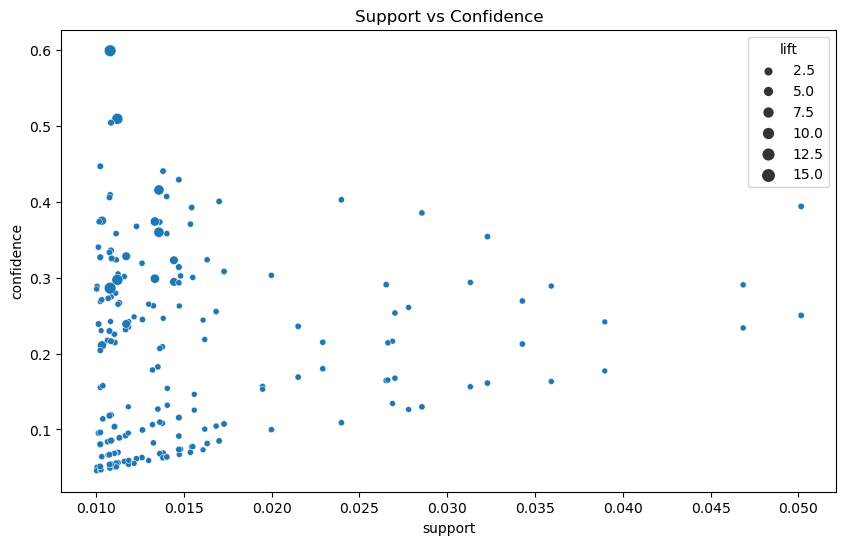

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of support vs confidence
plt.figure(figsize=(10, 6))
sns.scatterplot(x='support', y='confidence', size='lift', data=rules)
plt.title('Support vs Confidence')
plt.show()

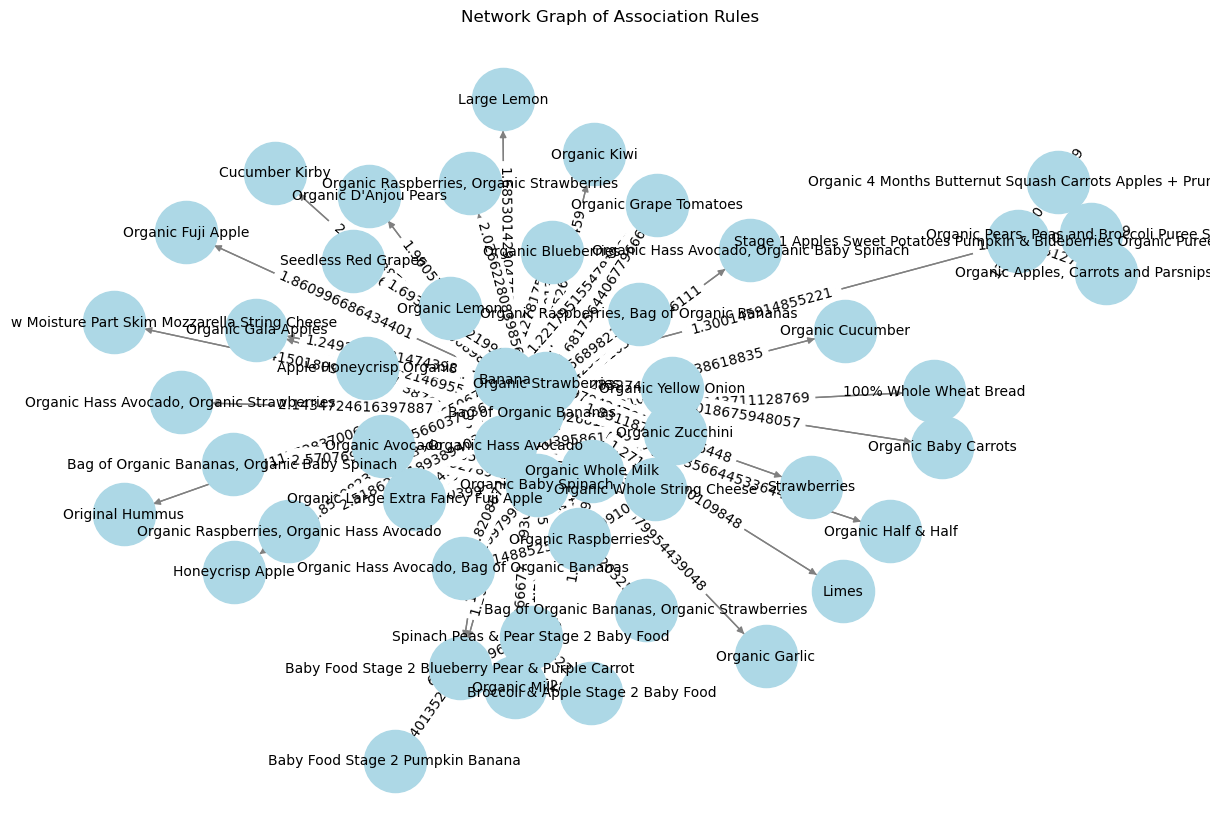

In [32]:
import networkx as nx

# Create a graph
G = nx.DiGraph()

# Add nodes and edges
for _, row in rules.iterrows():
    G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row['lift'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.8)  # k regulates the distance between nodes
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, edge_color='gray')
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title('Network Graph of Association Rules')
plt.show()


In [29]:
import pandas as pd
import numpy as np

# Assuming 'rules' is your DataFrame containing the association rules
# Convert the 'antecedents' and 'consequents' to strings to work with them more easily
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Create a matrix to store the lift values
unique_items = np.unique(rules[['antecedents', 'consequents']])
lift_matrix = pd.DataFrame(index=unique_items, columns=unique_items, data=np.zeros((len(unique_items), len(unique_items))))

# Populate the matrix with lift values
for i, row in rules.iterrows():
    lift_matrix.at[row['antecedents'], row['consequents']] = row['lift']
